In [181]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=500000, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

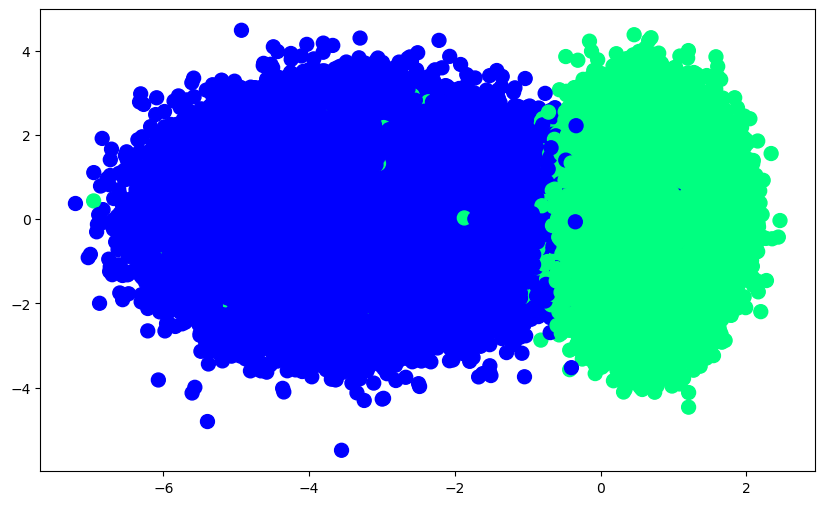

In [183]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [184]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X,y)

c:\Users\tesla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [185]:
lor.score(X,y)

0.993324

In [186]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [187]:
x_input = np.linspace(-3,3,100)

In [188]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [189]:
X.shape[0]

500000

In [190]:
def perceptron_gd(X,y):
    
    # X = np.insert(X,0,1,axis=1)
    # weights = np.ones(X.shape[1])
    # lr = 0.1
    # for i in range(5000):
    #     j = np.random.randint(0,100)
    #     y_hat = sig(np.dot(X[j],weights))
    #     weights = weights + (lr*(np.dot((y-y_hat),X)/X.shape[0]))
        
        
    # return weights[0],weights[1:]

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for j in range(1000):
        y_hat = sig(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]


def sig(x):
    return 1/(1+np.exp(-x))

In [191]:
coef_,intercept_ = perceptron_gd(X,y)

In [192]:
coef_

array([ 3.16437105, -0.00773928])

In [193]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [194]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

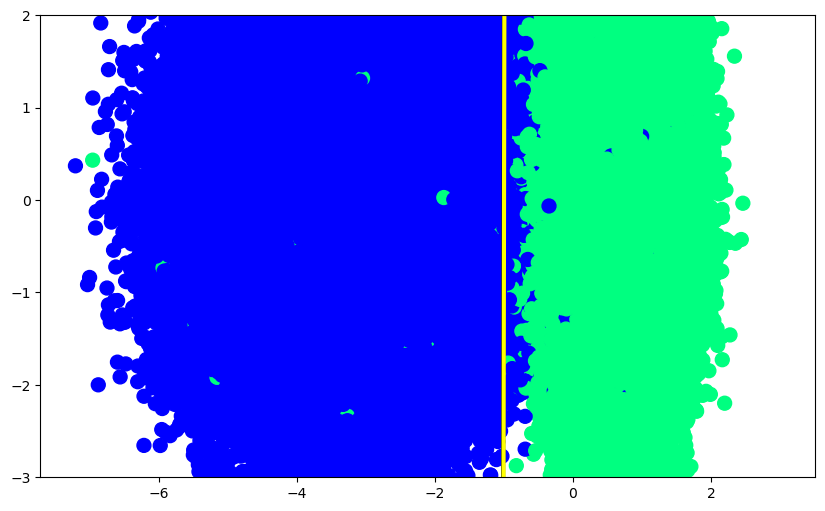

In [195]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)